### Import libraries

In [5]:
# Load Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Customize

In [6]:
# Customize parameters
my_input_file='0412 my_input.csv'
my_features = ['Project_Score', 'Training_Hours', 'Absenteeism_Rate', 'Peer_Feedback']
my_target = 'Performance_Level'
my_corr_plot = '0412 correl_plot.png'
my_feature_plot = '0412 feature_plot.png'


### Load data and train classifier

In [7]:
data = pd.read_csv(my_input_file)

# Define performance levels: 0 = Low, 1 = Average, 2 = High
conditions = [
    (data['Project_Score'] < 70) | (data['Peer_Feedback'] < 3.5),
    (data['Project_Score'].between(70, 85)) & (data['Peer_Feedback'] >= 3.5),
    (data['Project_Score'] > 85) & (data['Peer_Feedback'] >= 4.0)
]

choices = [0, 1, 2]

data['Performance_Level'] = np.select(conditions, choices, default=1)

# Split into Features and Labels
X = data[my_features]
y = data[my_target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Train Random Forest Classifier 
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


### Evaluate model

Classification Report:
              precision    recall  f1-score   support

         Low       0.89      0.80      0.84        10
     Average       0.50      0.83      0.62         6
        High       1.00      0.25      0.40         4

    accuracy                           0.70        20
   macro avg       0.80      0.63      0.62        20
weighted avg       0.79      0.70      0.69        20


 Confusion Matrix:


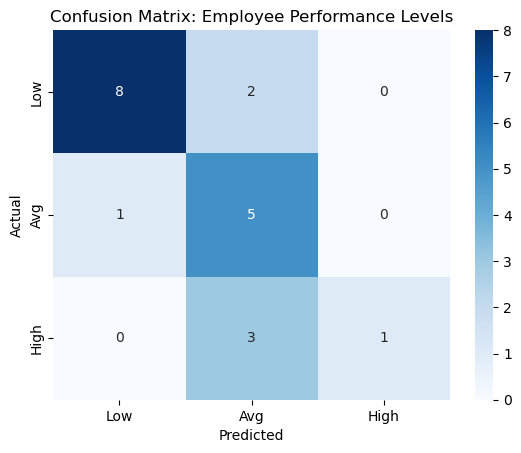

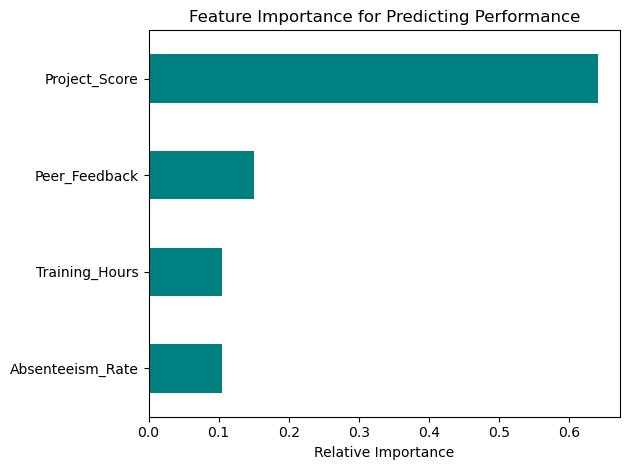

In [8]:
# Evaluation 
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Low', 'Average', 'High']))

print("\n Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Avg', 'High'], yticklabels=['Low', 'Avg', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Employee Performance Levels")
plt.savefig(my_corr_plot)
plt.show()

# Feature Importance Plot 
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)
importances.plot(kind='barh', title="Feature Importance for Predicting Performance", color='teal')
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.savefig(my_feature_plot)
plt.show()
